# Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
! pip install nltk

In [ ]:
! pip install spacy

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
! pip install sparknlp

In [ ]:
# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

In [ ]:
!pip install googletrans

In [ ]:
import os

# Install java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

openjdk version "1.8.0_282"
OpenJDK Runtime Environment (build 1.8.0_282-8u282-b08-0ubuntu1~18.04-b08)
OpenJDK 64-Bit Server VM (build 25.282-b08, mixed mode)


In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import nltk
import spacy
import sparknlp

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
df = pd.read_csv('/content/complete_data - Sheet1.csv')
df.head()

## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This train dataset has 2282 rows, and 14 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

1                   int64
user               object
labels             object
tweet              object
location           object
description        object
friends_count       int64
followers_count     int64
statuses_count     object
tweet_date         object
retweet_count       int64
likes               int64
hashtags           object
health_sector      object
dtype: object

In [ ]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   1                2282 non-null   int64 
 1   user             2282 non-null   object
 2   labels           2224 non-null   object
 3   tweet            2282 non-null   object
 4   location         2258 non-null   object
 5   description      2167 non-null   object
 6   friends_count    2282 non-null   int64 
 7   followers_count  2282 non-null   int64 
 8   statuses_count   2282 non-null   object
 9   tweet_date       2282 non-null   object
 10  retweet_count    2282 non-null   int64 
 11  likes            2282 non-null   int64 
 12  hashtags         2282 non-null   object
 13  health_sector    2282 non-null   object
dtypes: int64(5), object(9)
memory usage: 249.7+ KB


In [ ]:
# let us see the columns in our dataframe
df.columns

Index(['1', 'user', 'labels', 'tweet', 'location', 'description',
       'friends_count', 'followers_count', 'statuses_count', 'tweet_date',
       'retweet_count', 'likes', 'hashtags', 'health_sector'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df, title="Tweets Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Tweets_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us see the unique values of some of our columns
print('The labels column has the following unique values', df.labels.unique())
print('The health sector column has the following unique values', df.health_sector.unique())
print('The health sector column has the following unique values', df.location.unique())

The labels column has the following unique values [nan 'negative' 'neutral' 'positive' 'neuttral' 'nneutral' 'negtive']
The health sector column has the following unique values ['Pharmaceuticals' 'Others' 'others' 'medical practitioners'
 'Health Facilities' 'Hospital Supplies' 'Medical Insurance' 'Others '
 'Other']
The health sector column has the following unique values ['Nairobi, Kenya' 'Bungoma, Kenya' 'Nakuru, Kenya' 'Nairobi,Kenya'
 'NAIROBI' 'Western, Kenya' 'Nairobi-kenya' 'Kakamega County, Kenya🇰🇪'
 'Nairobi KENYA' 'Nairobi_Kenya' 'Nairobi' 'nakuru' 'Meru'
 'Central, Kenya' 'nairobi, kenya' 'Kisii' 'Mbale, Uganda' 'Kilifi, Kenya'
 'Nakuru,Kenya' 'Ahero, Kenya' 'Homa Bay, Kenya' 'Nairobi, Kenya.'
 'Kajiado, Kenya' 'Lamu Island' 'Malindi, Kenya' 'Kiambu, Kenya' 'Kenya'
 'Kenya,Nairobi' 'Nairobi, Ke' 'Nairobi Kenya' 'nairobi kenya'
 'Kilifi Kenya' 'Nyeri, Kenya' 'Nairobi-Kenya' 'Vihiga, Kenya'
 'Eldoret, Kenya' 'Machakos, Kenya' 'Kilimanjaro, Tanzania' 'Busia, Kenya'
 'kenya' 'K

# Data Cleaning

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['1', 'user', 'labels', 'tweet', 'location', 'description',
       'friends_count', 'followers_count', 'statuses_count', 'tweet_date',
       'retweet_count', 'likes', 'hashtags', 'health_sector'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

df_copy.drop(['1','user','description', 'hashtags'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

In [ ]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have 177 NaN in Age and 2 in Embarked.

labels :  58
tweet :  0
location :  24
friends_count :  0
followers_count :  0
statuses_count :  0
tweet_date :  0
retweet_count :  0
likes :  0
health_sector :  0


In [ ]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped just 80 rows of our dataframe
# this is not a significant part of our dataset which is ideal
# therefore we will work with the clean dataframe

Shape of dataframe with no missing values:  (2202, 10)
Shape of dataframe with missing values:  (2282, 10)


In [ ]:
df_clean.isnull().sum()

labels             0
tweet              0
location           0
friends_count      0
followers_count    0
statuses_count     0
tweet_date         0
retweet_count      0
likes              0
health_sector      0
dtype: int64

In [ ]:
# let us clean the labels column so all the labels are clean
df_clean['labels'] = df_clean['labels'].replace({'neuttral':'neutral', 'nneutral':'neutral', 'negativee':'negative', 'negtive':'negative'})
df_clean.labels.unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
# let us clean the labels column so all the health sectors are clean
df_clean['health_sector'] = df_clean['health_sector'].replace({'Others ':'Others', 'medical practitioners': 'Medical Practitioners',
                                                               'others':'Others', 'Other':'Others'})
df_clean['health_sector'].unique()

array(['Pharmaceuticals', 'Others', 'Medical Practitioners',
       'Health Facilities', 'Hospital Supplies', 'Medical Insurance'],
      dtype=object)

In [ ]:
#export cleanfile to csv
df_clean.to_csv('clean_health_data.csv')

# Exploratory Data Analysis

In [ ]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 1 to 2281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           2202 non-null   object
 1   tweet            2202 non-null   object
 2   location         2202 non-null   object
 3   friends_count    2202 non-null   int64 
 4   followers_count  2202 non-null   int64 
 5   statuses_count   2202 non-null   object
 6   tweet_date       2202 non-null   object
 7   retweet_count    2202 non-null   int64 
 8   likes            2202 non-null   int64 
 9   health_sector    2202 non-null   object
dtypes: int64(4), object(6)
memory usage: 189.2+ KB


In [ ]:
# let us see some summary statistics of the dataset
df_clean.describe()

,friends_count,followers_count,retweet_count,likes
count,2202.000000,2.202000e+03,2202.000000,2202.000000
mean,3191.764305,1.493131e+04,4.513624,23.789737
std,12075.461366,9.139686e+04,36.510167,151.393842
min,4.000000,0.000000e+00,0.000000,0.000000
25%,385.000000,2.430000e+02,0.000000,0.000000
50%,927.000000,8.580000e+02,0.000000,1.000000
75%,2349.000000,4.218250e+03,0.000000,3.000000
max,144205.000000,1.630633e+06,915.000000,2593.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd18e1e1150>,
      dtype=object)

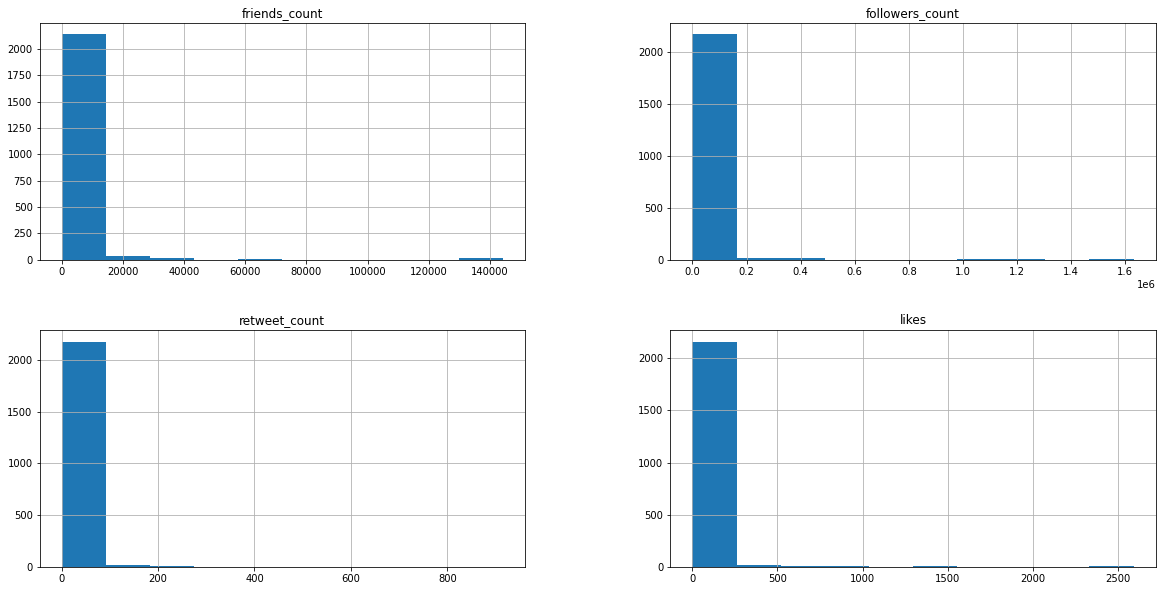

In [ ]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

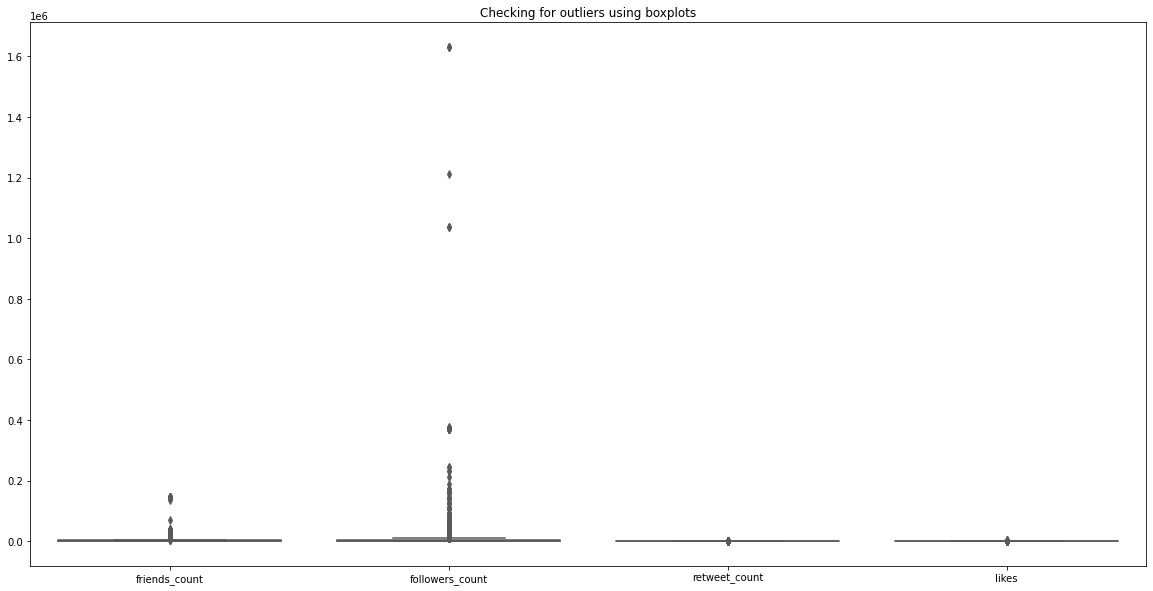

In [ ]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns

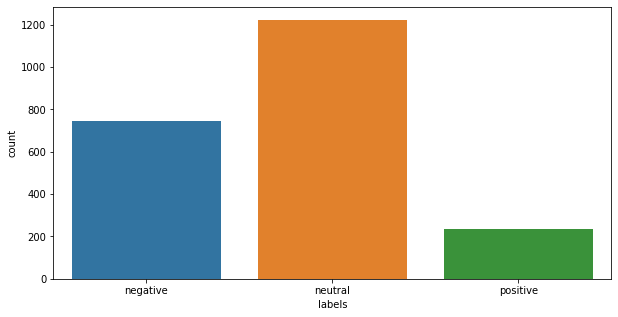

In [ ]:
# let us see how the labels are distributed in our dataset
plt.figure(figsize=(10,5))
sns.countplot(x="labels", data = df_clean)

# neutral labels are the highest in our data 

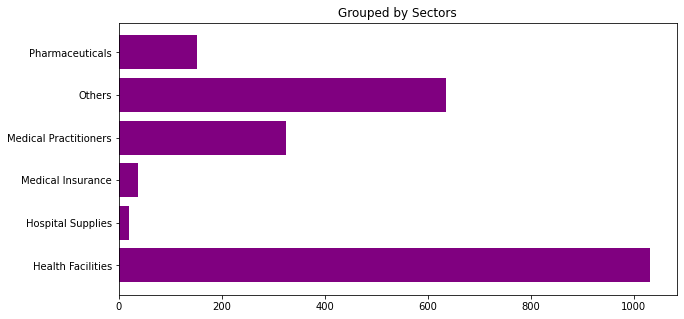

In [ ]:
# let us see how many sectors are in our data
# and in the process Get info about balanced or imbalanced data set.
sector_count = df_clean.groupby('health_sector')['health_sector'].count()

plt.figure(figsize=(10,5))
plt.barh(sector_count.index, sector_count.values, color='purple')
plt.title('Grouped by Sectors')

plt.show()
# we can see that most tweets are about health facilities 
# while there are hardly any tweets about medical insurance and hospital supplies 

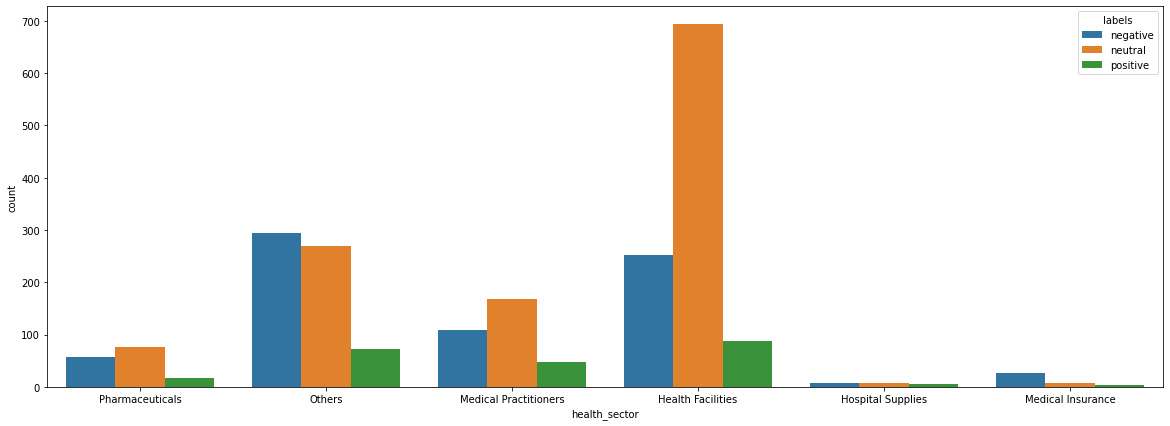

In [ ]:
# let us see the sectors by labels
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df_clean["health_sector"],hue = df_clean["labels"],ax=ax, data = df_clean)

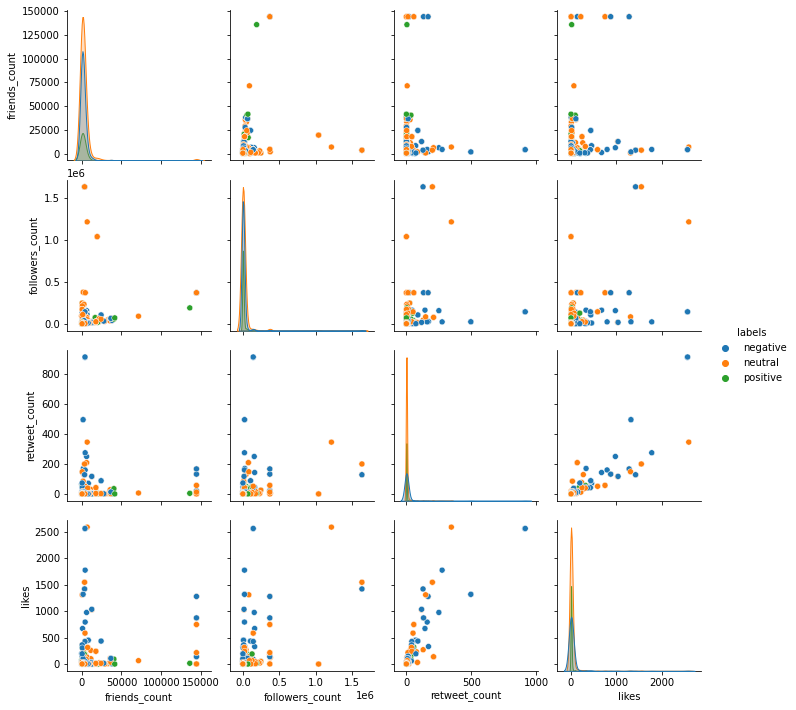

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean, hue="labels")
plt.show()

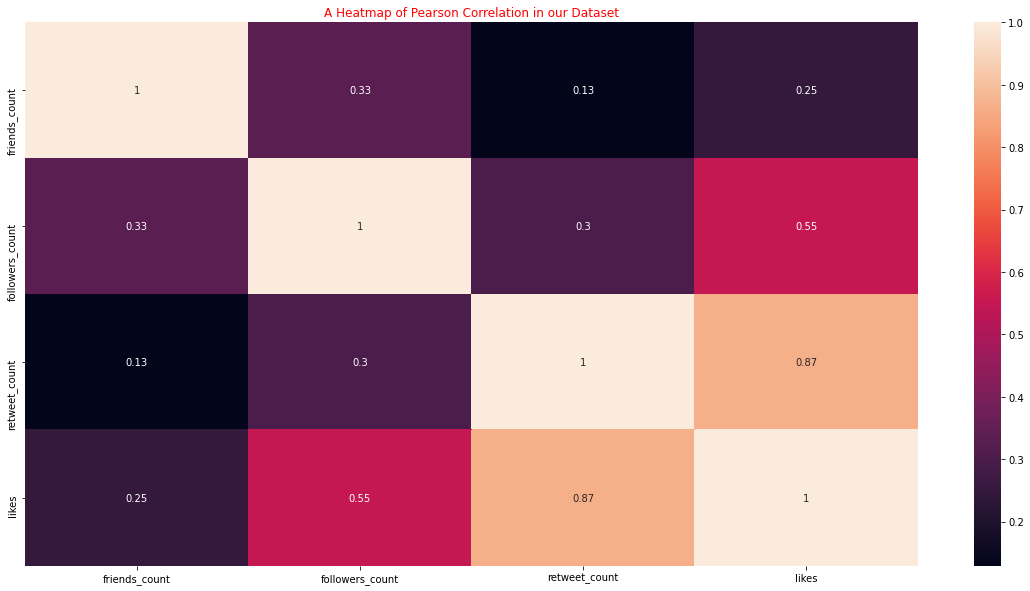

In [ ]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

# Data Pre-Processing

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
data = df_clean.copy(deep = True)

In [ ]:
# let us change the data type of our tweet column
data.info()
data.tweet= data.tweet.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 1 to 2281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           2202 non-null   object
 1   tweet            2202 non-null   object
 2   location         2202 non-null   object
 3   friends_count    2202 non-null   int64 
 4   followers_count  2202 non-null   int64 
 5   statuses_count   2202 non-null   object
 6   tweet_date       2202 non-null   object
 7   retweet_count    2202 non-null   int64 
 8   likes            2202 non-null   int64 
 9   health_sector    2202 non-null   object
dtypes: int64(4), object(6)
memory usage: 269.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 1 to 2281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           2202 non-null   object
 1   tweet            2202 non-null   object
 2   location 

In [ ]:
# let us create a dataset with only our columns of interest 
tweets = data[['labels', 'tweet', 'health_sector']]
tweets.head()

,labels,tweet,health_sector
1,negative,"Rich African leaders denounce science, get in...",Pharmaceuticals
2,negative,@HonKangata Rich African leaders denounce scie...,Pharmaceuticals
3,neutral,"@nyakundi_hezron During his birth , he receive...",Pharmaceuticals
4,positive,"@AshaJaffar Now go interview Chemist Owners, t...",Pharmaceuticals
5,neutral,1/2Today Mark's our last day isolation with my...,Others


In [ ]:
# let us make a copy of our dataset to clean and do modelling on
tweets_copy = tweets.copy(deep=True)

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
tweets_c = tweets.copy(deep=True)

### Google translate

In [ ]:
#cleaning so as to translate
# Using regex 

# Converting all characters in the tweet to lower case
#tweets_c['tweet'] = tweets_c.tweet.map(lambda x: x.lower())

#url removes
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')
tweets_c['tweet']= tweets_c['tweet'].str.replace(r'www\.\S+\.com','')

#removes retweets & cc
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r'rt|cc', '')

#hashtags removes
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r'#\S+', '')

#user mention removes
tweets_c['tweet'] =tweets_c['tweet'].str.replace(r'@\S+', '')

#emoji 
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r'[^\x00-\x7F]+', '')

#html tags
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r'<.*?>', '')

#removes extra spaces
tweets_c['tweet'] = tweets_c['tweet'].str.replace(r' +', ' ')

#punctuation
tweets_c['tweet'] = tweets_c['tweet'].str.replace('[^\w\s]', '').astype(str) 

#convert preprocessed list words to string 
tweets_c['tweet'] = tweets_c['tweet'].apply(''.join)

In [ ]:
!pip install google_trans_new

In [ ]:
from spacy.lang.en import English

nlp = English()

#convert tweet column to list
twl_1 = list(tweets_c.tweet)

from google_trans_new import google_translator  
translator = google_translator()  

#empyt list to hold translated tweets
trans_l = []

#iterate over each tweet to translate
for x in range(len(twl_1)):
  translate_text = translator.translate(twl_1[x],lang_src='sw', lang_tgt='en')  
  trans_l.append(translate_text)

#create a dataframe to hold the translated tweets
trans_ldf = pd.DataFrame(trans_l, columns=['transl_tweet'])
trans_ldf

#append it as a column back to the original dataframe and drop non-translated col
#reset the original df index
tweets_c.reset_index(inplace=True)
tweets_c['transl_tweet']= trans_ldf
tweets_ct = tweets_c.drop('tweet', axis=1)

In [ ]:
#lowercase the translated tweets
trans_ldf.transl_tweet = trans_ldf.transl_tweet.str.lower()

In [ ]:
#tokenizer, pos tagging and entity recognition
nlp = spacy.load('en')

trans_ldf.transl_tweet  = trans_ldf.transl_tweet.apply(lambda x: nlp(x))

In [ ]:
#stemming/lemmatization
trans_ldf.transl_tweet = trans_ldf.transl_tweet.apply(lambda x: [item.lemma_ for item in x ])

In [ ]:
#remove stop words
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

#remove stopwords
trans_ldf.transl_tweet = trans_ldf.transl_tweet.apply(lambda x: [item for item in x if item not in all_stopwords])

#convert preprocessed list words to string 
trans_ldf.transl_tweet = trans_ldf.transl_tweet.apply(' '.join)

In [ ]:
#append to df and drop col
tweets_ct['tweet'] = trans_ldf
final = tweets_ct.drop(['index','transl_tweet'], axis=1)
final

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
final_copy = final.copy(deep=True)

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df1 = final_copy.copy(deep=True)

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df = final_copy.copy(deep=True)

In [ ]:
# Finally, we will transform the data into occurrences, 
# which will be the features that we will feed into our model
# 
from sklearn.feature_extraction.text import CountVectorizer 
# build a vocabulary that only consider the top max_features ordered by the term frequency across the column
vectorizer = CountVectorizer(max_features=100)
# the function fit_transform() is used for dataset transformation in scikit learn
x = vectorizer.fit_transform(df.tweet).toarray()
y = df.labels.values

In [ ]:
# label encode the labels in our dataframe
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.labels)

# Naive Bayes Model

In [ ]:
# Training the Model
# We will start by splitting our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.5510204081632653
[[ 58 103   0]
 [ 46 183   7]
 [ 13  29   2]]
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       161
           1       0.58      0.78      0.66       236
           2       0.22      0.05      0.08        44

    accuracy                           0.55       441
   macro avg       0.43      0.39      0.39       441
weighted avg       0.51      0.55      0.52       441



In [ ]:
# Training our model and printing out metrics
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.22448979591836735
[[ 32  16 113]
 [ 18  29 189]
 [  2   4  38]]
              precision    recall  f1-score   support

           0       0.62      0.20      0.30       161
           1       0.59      0.12      0.20       236
           2       0.11      0.86      0.20        44

    accuracy                           0.22       441
   macro avg       0.44      0.40      0.23       441
weighted avg       0.55      0.22      0.24       441



# Random Forest Model

In [ ]:
# Train using 80% of the data.
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
print(np.mean(y_pred == y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5510204081632653
[[ 10 151   0]
 [  3 233   0]
 [  3  41   0]]
              precision    recall  f1-score   support

           0       0.62      0.06      0.11       161
           1       0.55      0.99      0.70       236
           2       0.00      0.00      0.00        44

    accuracy                           0.55       441
   macro avg       0.39      0.35      0.27       441
weighted avg       0.52      0.55      0.42       441



In [ ]:
# We will start by splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define pipeline
steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
print(mean(scores))

0.4562587412587412


# ANN - Aspect Based Model

In [ ]:
# label encode the labels in our dataframe
y = df.health_sector.values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.health_sector)

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)

In [ ]:
# splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#We use Sequential to initiate our model, and add layers to it:

#The first layer is a dense layer with 512 nodes. 
#The input shape is the shape of the word vectors
# We use the relu activation function (often used for faster learning).
#The second layer is our output layer. 
#Its number of nodes is the number of outputs we want. 
#The activation function is softmax because we want a probability distribution among the Aspect Categories.
# We have 6 Aspect Categories, so we want 6 nodes in the layer.


from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

aspect_categories_model = Sequential()
aspect_categories_model.add(Dense(512, input_shape= (100,), activation='relu'))
aspect_categories_model.add(Dense(512, activation='relu'))
aspect_categories_model.add(Dense(6, activation='softmax'))
aspect_categories_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model with input the encoded aspect terms and output the encoded aspect categories.
#The number of epochs is kept relatively low to avoid overfitting.

aspect_categories_model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
155/155 [==============================] - 2s 9ms/step - loss: 1.0956 - accuracy: 0.5964 - val_loss: 0.7256 - val_accuracy: 0.7070
Epoch 2/10
155/155 [==============================] - 1s 7ms/step - loss: 0.6372 - accuracy: 0.7351 - val_loss: 0.6851 - val_accuracy: 0.7207
Epoch 3/10
155/155 [==============================] - 1s 7ms/step - loss: 0.6090 - accuracy: 0.7434 - val_loss: 0.6652 - val_accuracy: 0.7167
Epoch 4/10
155/155 [==============================] - 1s 7ms/step - loss: 0.5752 - accuracy: 0.7565 - val_loss: 0.6787 - val_accuracy: 0.7304
Epoch 5/10
155/155 [==============================] - 1s 7ms/step - loss: 0.5545 - accuracy: 0.7662 - val_loss: 0.6396 - val_accuracy: 0.7240
Epoch 6/10
155/155 [==============================] - 1s 7ms/step - loss: 0.5096 - accuracy: 0.7796 - val_loss: 0.6659 - val_accuracy: 0.7353
Epoch 7/10
155/155 [==============================] - 1s 7ms/step - loss: 0.5268 - accuracy: 0.7801 - val_loss: 0.6706 - val_accuracy: 0.7288
Epoch 

In [ ]:
#Classification report
y_pred = aspect_categories_model.predict_classes(X_test)
print(np.mean(y_pred == y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7296206618240516
[[110   1   6   5  75   1]
 [  2 183  22   1   5   4]
 [  4   0 178   1   5  12]
 [  3   3   3 172  10  18]
 [ 85   8   3  25  86  18]
 [  0   6   0   5   4 175]]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       198
           1       0.91      0.84      0.88       217
           2       0.84      0.89      0.86       200
           3       0.82      0.82      0.82       209
           4       0.46      0.38      0.42       225
           5       0.77      0.92      0.84       190

    accuracy                           0.73      1239
   macro avg       0.72      0.74      0.73      1239
weighted avg       0.72      0.73      0.72      1239



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
text=np.array(["A hospital is a business. Inside that hospital oxygen n medicine is sold for profit. Beds r sold same price as Mara per day. Don't get me started with Insurance. Humanity is revolved around money n if u don't have money you have no right to your health. When did we normalize this"])
tk=Tokenizer(num_words=4000,lower=True,split=" ")
tk.fit_on_texts(text)

prediction=aspect_categories_model.predict_classes(pad_sequences(tk.texts_to_sequences(text),
maxlen=100))
print(label_encoder.inverse_transform(prediction))

['Health Facilities']


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
text=np.array(["Raila is in recovery"])
tk=Tokenizer(num_words=4000,lower=True,split=" ")
tk.fit_on_texts(text)

prediction=aspect_categories_model.predict_classes(pad_sequences(tk.texts_to_sequences(text),
maxlen=100))
print(label_encoder.inverse_transform(prediction))

['Health Facilities']


# ANN - Sentiment

In [ ]:
# label encode the labels in our dataframe
y = df.labels.values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.labels)

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)

In [ ]:
# splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#We use Sequential to initiate our model, and add layers to it:

#The first layer is a dense layer with 512 nodes. 
#The input shape is the shape of the word vectors
# We use the relu activation function (often used for faster learning).
#The second layer is our output layer. 
#Its number of nodes is the number of outputs we want. 
#The activation function is softmax because we want a probability distribution among the Aspect Categories.
# We have 6 Aspect Categories, so we want 6 nodes in the layer.


from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape= (100,), activation='relu'))
sentiment_model.add(Dense(512, activation='relu'))
sentiment_model.add(Dense(3, activation='softmax'))
sentiment_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model with input the encoded aspect terms and output the encoded aspect categories.
#The number of epochs is kept relatively low to avoid overfitting.

sentiment_model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
92/92 [==============================] - 1s 10ms/step - loss: 1.0419 - accuracy: 0.4666 - val_loss: 0.9661 - val_accuracy: 0.5286
Epoch 2/10
92/92 [==============================] - 1s 9ms/step - loss: 0.8762 - accuracy: 0.6055 - val_loss: 0.9153 - val_accuracy: 0.5545
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.7981 - accuracy: 0.6409 - val_loss: 0.9257 - val_accuracy: 0.5749
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.7698 - accuracy: 0.6528 - val_loss: 0.9583 - val_accuracy: 0.5559
Epoch 5/10
92/92 [==============================] - 1s 8ms/step - loss: 0.7494 - accuracy: 0.6471 - val_loss: 0.9438 - val_accuracy: 0.5749
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 0.6813 - accuracy: 0.6920 - val_loss: 0.9580 - val_accuracy: 0.5872
Epoch 7/10
92/92 [==============================] - 1s 8ms/step - loss: 0.6518 - accuracy: 0.7130 - val_loss: 1.0030 - val_accuracy: 0.5804
Epoch 8/10
92/92 [=

In [ ]:
#Classification report
y_pred = sentiment_model.predict_classes(X_test)
print(np.mean(y_pred == y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5885558583106267
[[137  73  35]
 [ 69 138  46]
 [ 30  49 157]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       245
           1       0.53      0.55      0.54       253
           2       0.66      0.67      0.66       236

    accuracy                           0.59       734
   macro avg       0.59      0.59      0.59       734
weighted avg       0.59      0.59      0.59       734



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
text=np.array(["i do not have any medication"])
tk=Tokenizer(num_words=4000,lower=True,split=" ")
tk.fit_on_texts(text)

prediction=sentiment_model.predict_classes(pad_sequences(tk.texts_to_sequences(text),
maxlen=100))
print(label_encoder.inverse_transform(prediction))

['neutral']


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
text=np.array(["Kenyatta Hospital has bad customer service"])
tk=Tokenizer(num_words=4000,lower=True,split=" ")
tk.fit_on_texts(text)

prediction=sentiment_model.predict_classes(pad_sequences(tk.texts_to_sequences(text),
maxlen=100))
print(label_encoder.inverse_transform(prediction))

['neutral']


# LSTM

In [ ]:
# Long Short-Term Memory (LSTM) networks are a type of recurrent neural network
# capable of learning order dependence in sequence prediction problems.

In [ ]:
import numpy as np 
import pandas as pd 
import keras
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


data=df1
max_features = 4000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['tweet'].values)
X = tokenizer.texts_to_sequences(data['tweet'].values)
X = pad_sequences(X)


embed_dim = 128
lstm_out = 196
model = Sequential()
keras.layers.core.SpatialDropout1D(0.5) #used to avoid overfitting
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(LSTM(196, recurrent_dropout=0.5, dropout=0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
#splitting data in training and testing parts

Y = pd.get_dummies(data['labels']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
batch_size = 128
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2, validation_data= (X_test, Y_test))


score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = 128)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 128)           512000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 591       
Total params: 767,391
Trainable params: 767,391
Non-trainable params: 0
_________________________________________________________________
None
(1541, 34) (1541, 3)
(661, 34) (661, 3)
Epoch 1/7
13/13 - 11s - loss: 1.0028 - accuracy: 0.5367 - val_loss: 0.9281 - val_accuracy: 0.5340
Epoch 2/7
13/13 - 6s - loss: 0.9100 - accuracy: 0.5659 - val_loss: 0.9279 - val_accuracy: 0.5325
Epoch 3/7
13/13 - 7s - loss: 0.8841 - accuracy: 0.5808 - val_loss: 0.8932 - val_accuracy: 0.5855
Epoch 4/7
13/13 - 7s - loss: 0.8253 - ac

In [ ]:
# let us make a prediction
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
text=np.array(["hospitals are beneficial"])
tk=Tokenizer(num_words=4000,lower=True,split=" ")
tk.fit_on_texts(text)

prediction=model.predict_classes(pad_sequences(tk.texts_to_sequences(text),
maxlen=100))
print(label_encoder.inverse_transform(prediction))

['neutral']


# **Aspect Based Sentiment Analysis in Spark NLP**

Install Dependencies and Libraries

In [ ]:
# Install Java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
! java -version

# Install pyspark
! pip install --ignore-installed -q pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp
# Install Spark NLP Display lib
! pip install --upgrade -q spark-nlp-display

openjdk version "1.8.0_282"
OpenJDK Runtime Environment (build 1.8.0_282-8u282-b08-0ubuntu1~18.04-b08)
OpenJDK 64-Bit Server VM (build 25.282-b08, mixed mode)
  Using cached https://files.pythonhosted.org/packages/1b/d9/44fd438e15fa9a02c0e3b3ca9eaffc509fc626592f7a03ce05d8f156d448/spark_nlp-2.7.5-py2.py3-none-any.whl


     |████████████████████████████████| 102kB 3.4MB/s 
     |████████████████████████████████| 71kB 3.3MB/s 


Import and start the Spark session

In [ ]:
import os
import sys

os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ['PATH'] = os.environ['JAVA_HOME'] + "/bin:" + os.environ['PATH']

import pandas as pd
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import sparknlp
from sparknlp.annotator import *
from sparknlp.base import *

spark = sparknlp.start()

# manually start session
'''
spark = SparkSession.builder \
    .appName('Spark NLP Licensed') \
    .master('local[*]') \
    .config('spark.driver.memory', '16G') \
    .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer') \
    .config('spark.kryoserializer.buffer.max', '2000M') \
    .config('spark.jars.packages', 'com.johnsnowlabs.nlp:spark-nlp_2.11:' +sparknlp.version()).getOrCreate()
'''

"\nspark = SparkSession.builder     .appName('Spark NLP Licensed')     .master('local[*]')     .config('spark.driver.memory', '16G')     .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer')     .config('spark.kryoserializer.buffer.max', '2000M')     .config('spark.jars.packages', 'com.johnsnowlabs.nlp:spark-nlp_2.11:' +sparknlp.version()).getOrCreate()\n"

##2. Build Pipeline

In [ ]:
document_assembler = DocumentAssembler() \
    .setInputCol('text')\
    .setOutputCol('document')

sentence_detector = SentenceDetector() \
    .setInputCols(['document'])\
    .setOutputCol('sentence')

tokenizer = Tokenizer()\
    .setInputCols(['sentence']) \
    .setOutputCol('token')

word_embeddings = WordEmbeddingsModel.pretrained("glove_6B_300", "xx")\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")
    
ner_model = NerDLModel.pretrained("ner_aspect_based_sentiment")\
    .setInputCols(["document", "token", "embeddings"])\
    .setOutputCol("ner")

ner_converter = NerConverter()\
    .setInputCols(['sentence', 'token', 'ner']) \
    .setOutputCol('ner_chunk')

nlp_pipeline = Pipeline(stages=[
    document_assembler, 
    sentence_detector,
    tokenizer,
    word_embeddings,
    ner_model,
    ner_converter])

empty_df = spark.createDataFrame([['']]).toDF('text')
pipeline_model = nlp_pipeline.fit(empty_df)
light_pipeline = LightPipeline(pipeline_model)

glove_6B_300 download started this may take some time.
Approximate size to download 426.2 MB
[OK!]
ner_aspect_based_sentiment download started this may take some time.
Approximate size to download 21.3 MB
[OK!]


## 3. Create example inputs

In [ ]:
# selecting the target column and changing its conetents to lowercase
ddf = tweets_ct.transl_tweet.str.lower()

In [ ]:
# Enter examples as strings in this array
t = ddf.to_list()

input_list = [
    """From the beginning, we were met by friendly staff members, and the convienent parking at Chelsea Piers made it easy for us to get to the boat."""]

## 4. Run the pipeline

Full Pipeline (Expects a spark Data Frame)

In [ ]:
df = spark.createDataFrame(pd.DataFrame({"text": t}))
result = pipeline_model.transform(df)

Light Pipeline (Expects a list of string)

In [ ]:
#lresult = light_pipeline.fullAnnotate(t)

## 5. Visualize results

Full Pipeline Result

In [ ]:
# Using display lib
from sparknlp_display import NerVisualizer

NerVisualizer().display(result.collect()[0], 'ner_chunk', 'document')

In [ ]:
# Process manually
exploded = F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata'))
select_expression_0 = F.expr("cols['0']").alias("chunk")
select_expression_1 = F.expr("cols['1']['entity']").alias("ner_label")
result.select(exploded.alias("cols")) \
    .select(select_expression_0, select_expression_1).show(truncate=False)
result = result.toPandas()

+--------------------+---------+
|chunk               |ner_label|
+--------------------+---------+
|parcels             |NEG      |
|parcels             |NEG      |
|bih                 |NEG      |
|delivery            |NEG      |
|visus               |POS      |
|counter             |POS      |
|charmacy            |POS      |
|sumum               |NEG      |
|diseasewont         |NEG      |
|medication          |POS      |
|herbalist           |POS      |
|county              |NEG      |
|flu sent race akibut|POS      |
|ranges              |NEG      |
|chemist             |NEG      |
|amoeba medication   |POS      |
|medication          |NEG      |
|buana               |POS      |
|chemist             |NEG      |
|sale                |NEG      |
+--------------------+---------+
only showing top 20 rows



# Saving a model for deployment

Out of the models we have built, the ANN models performed the best and therefore, we will be saving these models for deployment purposes. 



In [ ]:
from keras.models import load_model

aspect_categories_model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [ ]:
from keras.models import load_model

sentiment_model.save('sent_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('sent_model.h5')

In [ ]:
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

# Conclusions